To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 4 - Batch Normalization, Dropout, MNIST

## 4.1

**Answer:**
Co Adaptation: When more than one features/neruors in a neural nerwork become reliant upon eachother duing the training phase. This causes changes in one neuron to have large affects on the behavior of the oother. This is not good because it means that neurons arent learning the unique featues of the data set because they are reacting to changes in other neurons instead.

An example of this is a model where two neurons are learning almost identical features ie an image classification model where two neurons are both detecting the same aspect of the image then one neuron could be removed and there would be little change in the model.

Covariance shift: This is the change in the distribution of layer activations during training. As weights are updated during training of deep neural networks activation distributions can change. This menas that deeper layers need to be changing in response to new distributions. This can cause the training process to go slower because each layer has ot relearn at every step.

An example of this would be if the deeper layers of a network is detecting features based on different feature being detected in initial layers. If initial layers start producing different features the deeper layers will need to also adapt to adjsut for new features.

## 4.2

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import initializers
from tensorflow.keras import layers

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Define LeNet-5 with Batch Normalization
model = tf.keras.models.Sequential()

initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.) # for the intial layer
# Input layer: Standard normalization
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), kernel_initializer = initializer))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(BatchNormalization())

model.add(Dense(84, activation='tanh'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/10
469/469 [==============================] - 29s 59ms/step - loss: 0.3767 - accuracy: 0.8953 - val_loss: 0.1754 - val_accuracy: 0.9546
Epoch 2/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1551 - accuracy: 0.9577 - val_loss: 0.1186 - val_accuracy: 0.9684
Epoch 3/10
469/469 [==============================] - 28s 59ms/step - loss: 0.1166 - accuracy: 0.9675 - val_loss: 0.0976 - val_accuracy: 0.9726
Epoch 4/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0970 - accuracy: 0.9731 - val_loss: 0.0854 - val_accuracy: 0.9755
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0843 - accuracy: 0.9764 - val_loss: 0.0740 - val_accuracy: 0.9778
Epoch 6/10
469/469 [==============================] - 26s 57ms/step - loss: 0.0763 - accuracy: 0.9785 - val_loss: 0.0685 - val_accuracy: 0.9786
Epoch 7/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0698 - accuracy: 0.9800 - val_loss: 0.0642 - val_accuracy:

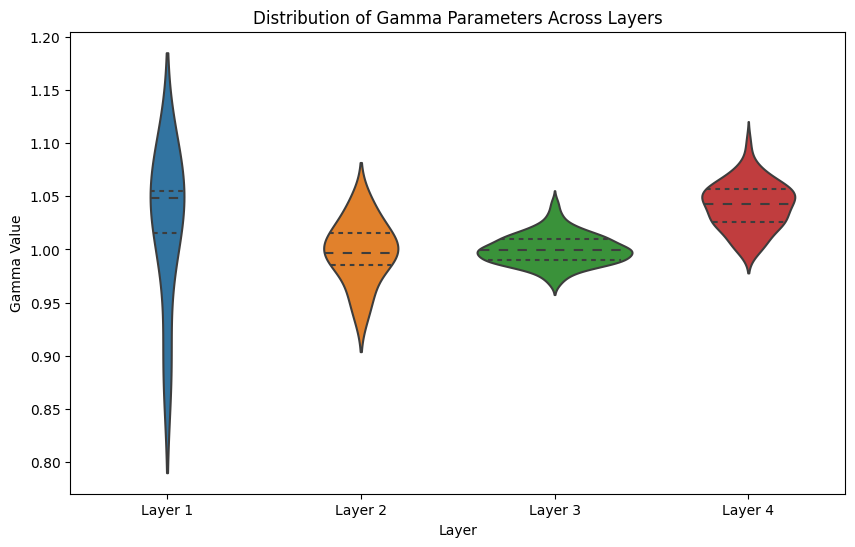

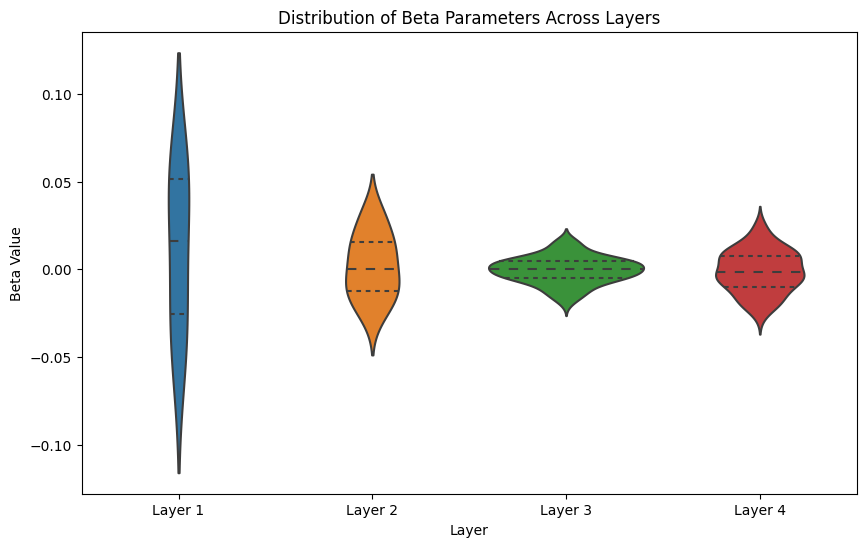

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
batch_norm_layers = [layer for layer in model.layers if isinstance(layer, BatchNormalization)]

# Extract gamma and beta parameters
gammas = [layer.gamma.numpy() for layer in batch_norm_layers]
betas = [layer.beta.numpy() for layer in batch_norm_layers]

# Combine data for a single plot
layer_indices = [f"Layer {i+1}" for i in range(len(batch_norm_layers))]
gamma_data = []
beta_data = []

for gamma, beta, layer_index in zip(gammas, betas, layer_indices):
    gamma_data.extend(zip([layer_index] * len(gamma), gamma))
    beta_data.extend(zip([layer_index] * len(beta), beta))

df_gamma = pd.DataFrame(gamma_data, columns=['Layer', 'Gamma Value'])
df_beta = pd.DataFrame(beta_data, columns=['Layer', 'Beta Value'])

# Plotting Gamma parameters
plt.figure(figsize=(10, 6))
sns.violinplot(x='Layer', y='Gamma Value', data=df_gamma, inner="quartile")
plt.title("Distribution of Gamma Parameters Across Layers")
plt.show()

# Plotting Beta parameters
plt.figure(figsize=(10, 6))
sns.violinplot(x='Layer', y='Beta Value', data=df_beta, inner="quartile")
plt.title("Distribution of Beta Parameters Across Layers")
plt.show()



For Beta:
Layer 1 - Very thin and tall(wider range in beta values). Little spread around one.
Layer 2 - there is a wider spread in the beta values meaning there is more variance in the shifts.
Layer 3 - this is not as tall as layer 2 meaning it is a bit more conisistent shift across the neurons for this layer.
Layer 4 - there is a smaller spread at 0 than with layer 3 but a wider range of beta values.  


Gamma:

Layer 1 - Most of the gamma values are close to 1, this means there is less scaling from the inital standard normalization.
Layer 2 - A slightly wider distribution than in Layer 1, meaning there is slightly more variance.
Layer 3 -  Much broader spread.
Layer 4- Less spread than layer 3.


## 4.3

In [ ]:
# Define LeNet-5 with Batch Normalization including the Input layer
model_bn = tf.keras.models.Sequential()

# Batch normalization for input layer
model_bn.add(BatchNormalization(input_shape=(28, 28, 1)))

model_bn.add(Conv2D(6, kernel_size=(5, 5), activation='tanh'))
model_bn.add(AveragePooling2D(pool_size=(2, 2)))
model_bn.add(BatchNormalization())

model_bn.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model_bn.add(AveragePooling2D(pool_size=(2, 2)))
model_bn.add(BatchNormalization())

model_bn.add(Flatten())
model_bn.add(Dense(120, activation='tanh'))
model_bn.add(BatchNormalization())

model_bn.add(Dense(84, activation='tanh'))
model_bn.add(BatchNormalization())

model_bn.add(Dense(10, activation='softmax'))

# Compile the model
model_bn.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_bn = model_bn.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

plt.figure(figsize=(14, 6))



Epoch 1/10
469/469 [==============================] - 36s 74ms/step - loss: 0.4131 - accuracy: 0.8823 - val_loss: 0.2168 - val_accuracy: 0.9417
Epoch 2/10
469/469 [==============================] - 36s 76ms/step - loss: 0.1901 - accuracy: 0.9470 - val_loss: 0.1357 - val_accuracy: 0.9606
Epoch 3/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1346 - accuracy: 0.9624 - val_loss: 0.1039 - val_accuracy: 0.9691
Epoch 4/10
469/469 [==============================] - 34s 73ms/step - loss: 0.1068 - accuracy: 0.9708 - val_loss: 0.0845 - val_accuracy: 0.9749
Epoch 5/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0906 - accuracy: 0.9749 - val_loss: 0.0739 - val_accuracy: 0.9783
Epoch 6/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0800 - accuracy: 0.9786 - val_loss: 0.0675 - val_accuracy: 0.9808
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0724 - accuracy: 0.9795 - val_loss: 0.0618 - val_accuracy:

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

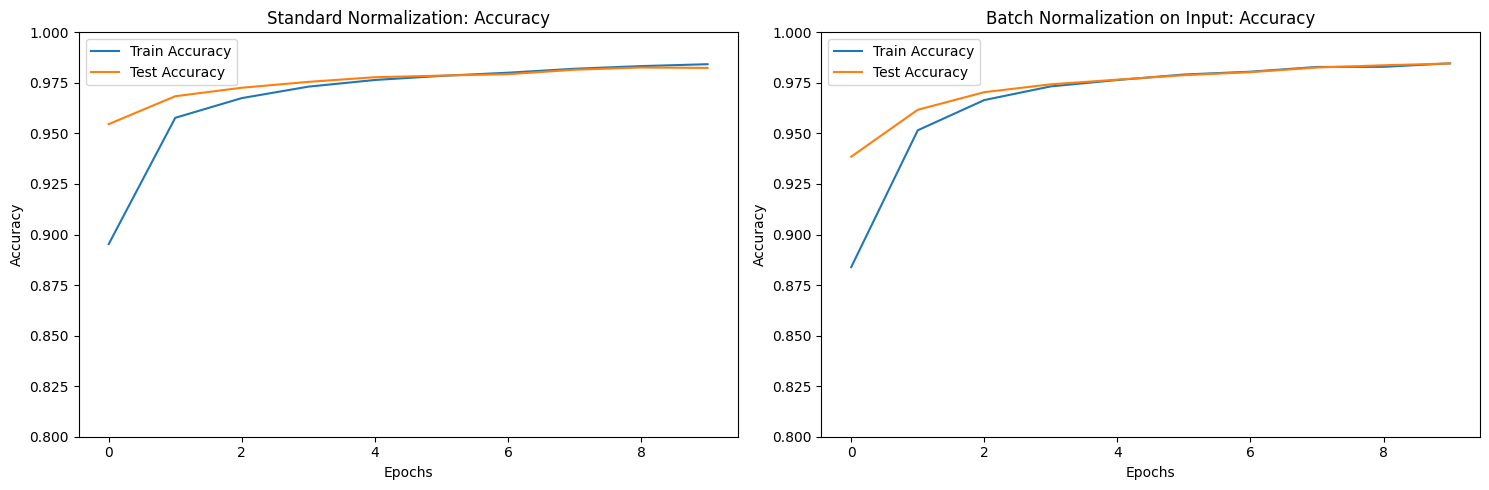

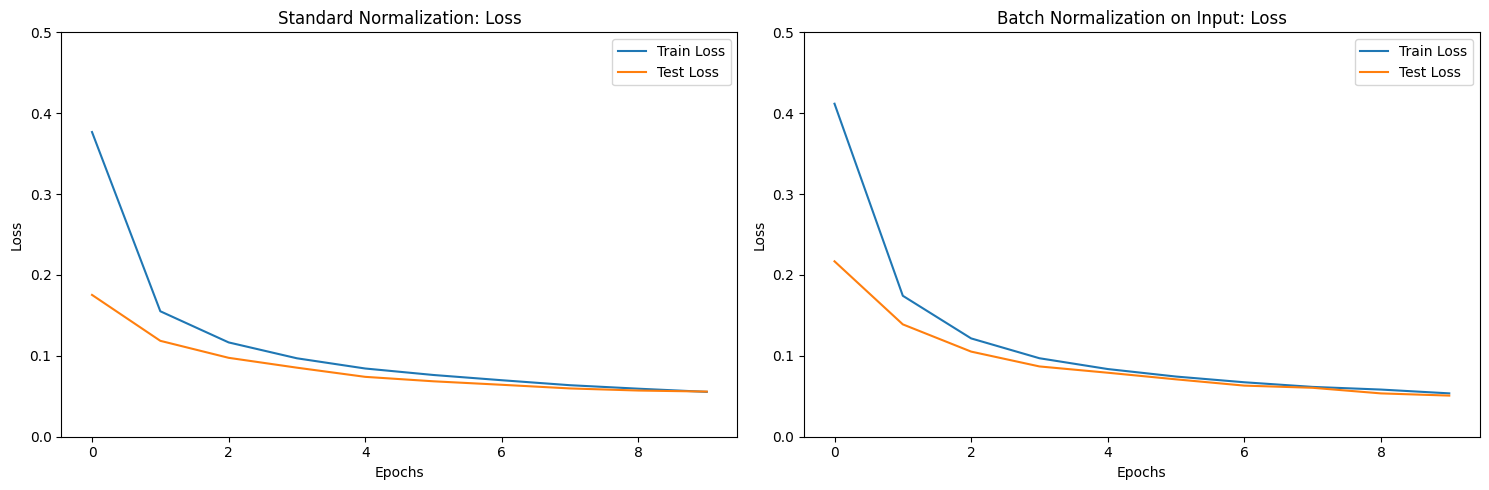

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two histories from training the models:
# history_standard: the model trained with standard normalization for the input
# history_bn_input: the model trained with batch normalization for the input

# Plotting accuracy
plt.figure(figsize=(15,5))

# Standard normalization accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Standard Normalization: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1) # Ensuring that both subplots have the same y-axis scale
plt.legend()

# Batch normalization accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(history_bn.history['accuracy'], label='Train Accuracy')
plt.plot(history_bn.history['val_accuracy'], label='Test Accuracy')
plt.title('Batch Normalization on Input: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1) # Ensuring that both subplots have the same y-axis scale
plt.legend()

plt.tight_layout()
plt.show()

# Plotting loss
plt.figure(figsize=(15,5))

# Standard normalization loss subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Standard Normalization: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.legend()

# Batch normalization loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_bn.history['loss'], label='Train Loss')
plt.plot(history_bn.history['val_loss'], label='Test Loss')
plt.title('Batch Normalization on Input: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.legend()

plt.tight_layout()
plt.show()


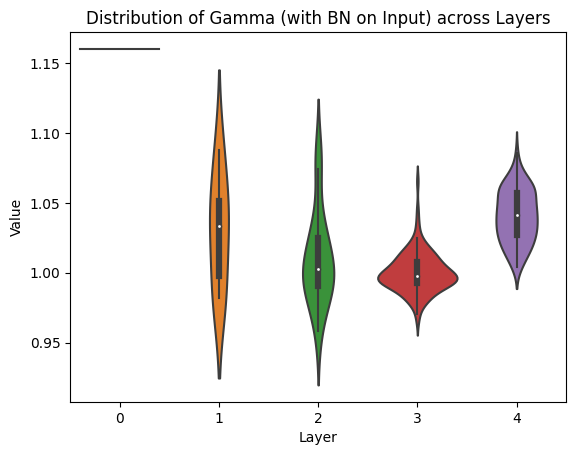

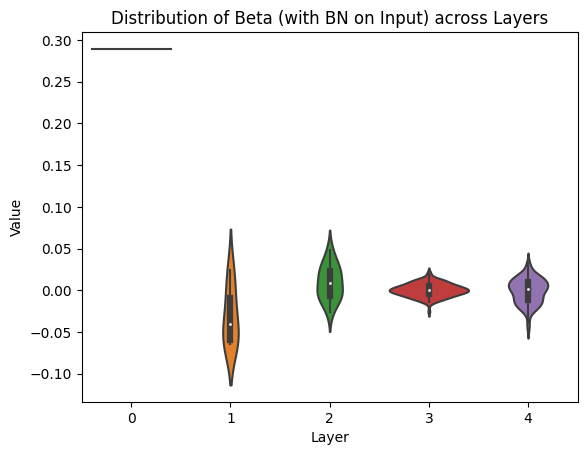

In [ ]:
import numpy as np
# Extract the gamma and beta values from the model
gamma_values_bn_input = []  # For scale parameters
beta_values_bn_input = []   # For offset parameters

for layer in model_bn.layers:
    if isinstance(layer, layers.BatchNormalization):
        gamma, beta = layer.get_weights()[0], layer.get_weights()[1]
        gamma_values_bn_input.append(gamma)
        beta_values_bn_input.append(beta)

# Plot the violin plots using seaborn
import seaborn as sns

def plot_violin(data, title):
    parts = sns.violinplot(data=[np.asarray(d) for d in data], showmeans=True, showmedians=True)
    plt.title(title)
    plt.xlabel('Layer')
    plt.ylabel('Value')
    plt.show()

plot_violin(gamma_values_bn_input, 'Distribution of Gamma (with BN on Input) across Layers')
plot_violin(beta_values_bn_input, 'Distribution of Beta (with BN on Input) across Layers')

**Answer:**
Based on my reuslts I would say that batch normalization odid imporove performance.

For standard normalization the training accuracy increases to almost 1 at 4 epochs. The testing accuracy increases as well but they do diverge as epoch increases. This could be an indicator of overfitting

Batch Normalization:
Training and test accuracies are closer than in the standard normalization.
Convergence on accuracy seems to be faster. This overall may indicate that the model is generalizing better.

Overall: The batch normalization has slightly decreased divergence between test and training
From this observation, it appears that adding batch normalization on input has helped in reducing the divergence between the training and test accuracies, potentially making the model generalize better to unseen data. This can be particularly beneficial in preventing overfitting, especially in deep neural networks.

Overall the batch normalization model had slightly higher accuracy, lower loss, faster convergence and stabilized parameter distributions.

## 4.4

Epoch 1/10
469/469 [==============================] - 28s 58ms/step - loss: 1.5958 - accuracy: 0.4781 - val_loss: 0.6794 - val_accuracy: 0.8358
Epoch 2/10
469/469 [==============================] - 26s 56ms/step - loss: 0.7726 - accuracy: 0.7610 - val_loss: 0.3976 - val_accuracy: 0.8921
Epoch 3/10
469/469 [==============================] - 26s 55ms/step - loss: 0.5785 - accuracy: 0.8213 - val_loss: 0.3037 - val_accuracy: 0.9141
Epoch 4/10
469/469 [==============================] - 26s 56ms/step - loss: 0.4770 - accuracy: 0.8553 - val_loss: 0.2540 - val_accuracy: 0.9251
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.4121 - accuracy: 0.8754 - val_loss: 0.2198 - val_accuracy: 0.9345
Epoch 6/10
469/469 [==============================] - 27s 57ms/step - loss: 0.3640 - accuracy: 0.8893 - val_loss: 0.1917 - val_accuracy: 0.9438
Epoch 7/10
469/469 [==============================] - 35s 74ms/step - loss: 0.3300 - accuracy: 0.9014 - val_loss: 0.1719 - val_accuracy:

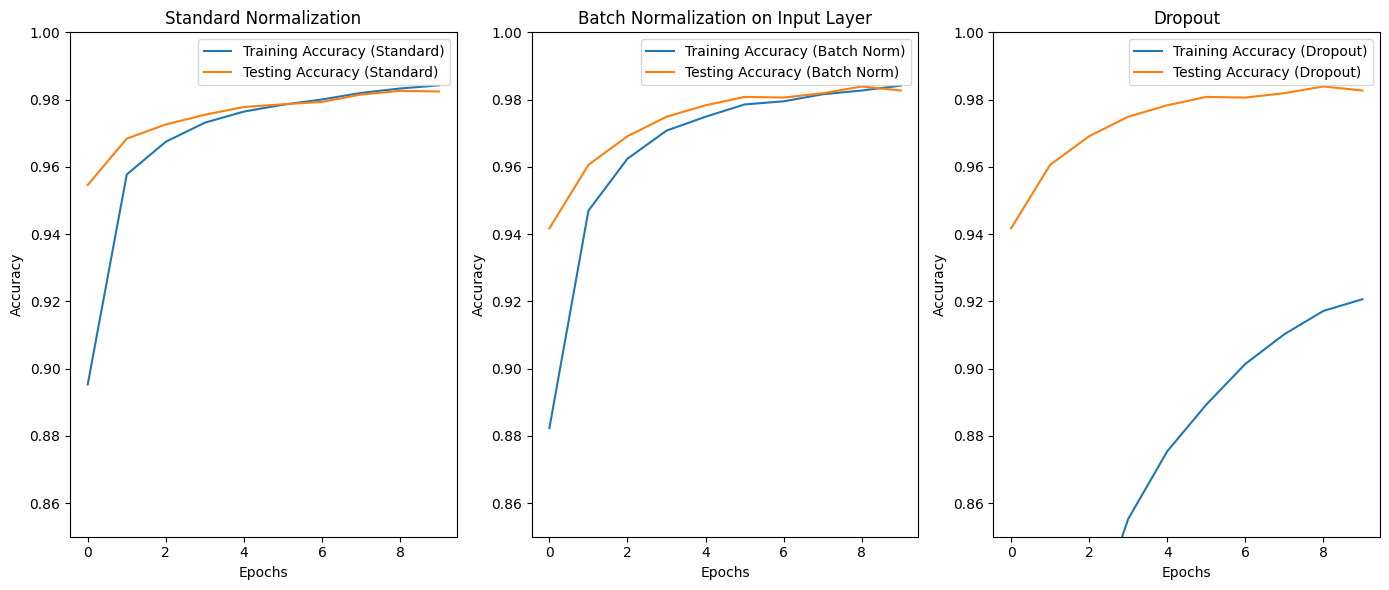

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
# Define LeNet-5 with Dropout
model_dropout = tf.keras.models.Sequential()

# Dropout for input layer
model_dropout.add(Dropout(0.2, input_shape=(28, 28, 1)))

model_dropout.add(Conv2D(6, kernel_size=(5, 5), activation='tanh'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2)))

model_dropout.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2)))

model_dropout.add(Flatten())
model_dropout.add(Dense(120, activation='tanh'))
model_dropout.add(Dropout(0.5))  # Dropout for hidden layers

model_dropout.add(Dense(84, activation='tanh'))
model_dropout.add(Dropout(0.5))  # Dropout for hidden layers

model_dropout.add(Dense(10, activation='softmax'))

# Compile the model
model_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dropout = model_dropout.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# Extract training and testing accuracy values
train_acc_dropout = history_dropout.history['accuracy']
test_acc_dropout = history_dropout.history['val_accuracy']
train_acc_standard = history.history['accuracy']
test_acc_standard = history.history['val_accuracy']
train_acc_batch = history_bn.history['accuracy']
test_acc_batch = history_bn.history['val_accuracy']
# For plotting all three experiments together:
plt.figure(figsize=(14, 6))

# Plotting for Standard Normalization
plt.subplot(1, 3, 1)
plt.plot(train_acc_standard, label='Training Accuracy (Standard)')
plt.plot(test_acc_standard, label='Testing Accuracy (Standard)')
plt.title('Standard Normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.85,1)
plt.legend()

# Plotting for Batch Normalization on Input Layer
plt.subplot(1, 3, 2)
plt.plot(train_acc_batch, label='Training Accuracy (Batch Norm)')
plt.plot(test_acc_batch, label='Testing Accuracy (Batch Norm)')
plt.title('Batch Normalization on Input Layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.85,1)
plt.legend()

# Plotting for Dropout
plt.subplot(1, 3, 3)
plt.plot(train_acc_dropout, label='Training Accuracy (Dropout)')
plt.plot(test_acc_batch, label='Testing Accuracy (Dropout)')
plt.title('Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.85,1)
plt.legend()

plt.tight_layout()
plt.show()


**Answer:**
Standard Normalization:
Training accuracy increases but graudally and it begins to level off around 5 epochs.

Batch normalizaton on input layer:
Both training and testing increase as epochs increase, slowing down around five epochs. There is a gap between train and test which may indicate over fitting. This is a bigger gap than was in the standard normalization.

Dropout:
Training and test data has a very large gap. It has a similiar testing accuracy to the first two plots but the training is much lower. The training data is rising much quicker than the testing data. Overall this indicates that drop out regularized the data to prevent it from overftiting. Even tho the accuracy may be increasing slower than teh first two models it may be a better choice in the long run.

## 4.5

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Define the model with Batch Normalization and Dropout
model_bn_dropout = tf.keras.models.Sequential()

# Batch normalization for the input layer
model_bn_dropout.add(BatchNormalization(input_shape=(28, 28, 1)))
model_bn_dropout.add(Dropout(0.2))

model_bn_dropout.add(Conv2D(6, kernel_size=(5, 5), activation='tanh'))
model_bn_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_bn_dropout.add(BatchNormalization())
model_bn_dropout.add(Dropout(0.5))

model_bn_dropout.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model_bn_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_bn_dropout.add(BatchNormalization())
model_bn_dropout.add(Dropout(0.5))

model_bn_dropout.add(Flatten())
model_bn_dropout.add(Dense(120, activation='tanh'))
model_bn_dropout.add(BatchNormalization())
model_bn_dropout.add(Dropout(0.5))

model_bn_dropout.add(Dense(84, activation='tanh'))
model_bn_dropout.add(BatchNormalization())
model_bn_dropout.add(Dropout(0.5))

model_bn_dropout.add(Dense(10, activation='softmax'))

# Compile the model
model_bn_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_bn_dropout = model_bn_dropout.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))




Epoch 1/10
469/469 [==============================] - 41s 85ms/step - loss: 1.9694 - accuracy: 0.3785 - val_loss: 0.5289 - val_accuracy: 0.8403
Epoch 2/10
469/469 [==============================] - 40s 85ms/step - loss: 1.1016 - accuracy: 0.6275 - val_loss: 0.4143 - val_accuracy: 0.8782
Epoch 3/10
469/469 [==============================] - 40s 85ms/step - loss: 0.8818 - accuracy: 0.7079 - val_loss: 0.3554 - val_accuracy: 0.8918
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 0.7619 - accuracy: 0.7516 - val_loss: 0.3022 - val_accuracy: 0.9077
Epoch 5/10
469/469 [==============================] - 40s 84ms/step - loss: 0.6804 - accuracy: 0.7827 - val_loss: 0.2688 - val_accuracy: 0.9187
Epoch 6/10
469/469 [==============================] - 40s 85ms/step - loss: 0.6206 - accuracy: 0.8005 - val_loss: 0.2317 - val_accuracy: 0.9293
Epoch 7/10
469/469 [==============================] - 40s 85ms/step - loss: 0.5802 - accuracy: 0.8149 - val_loss: 0.2231 - val_accuracy:

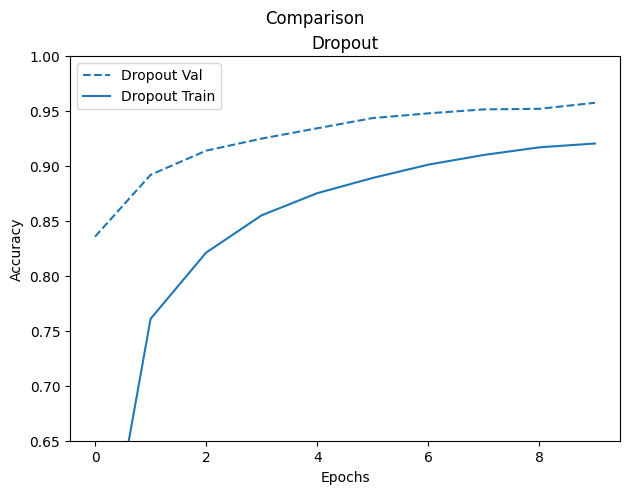

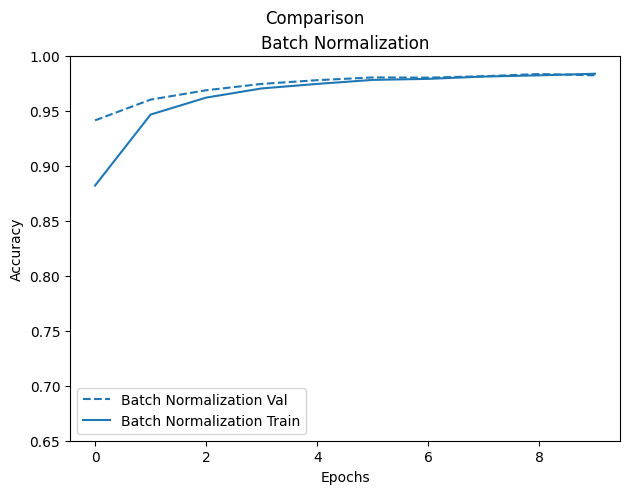

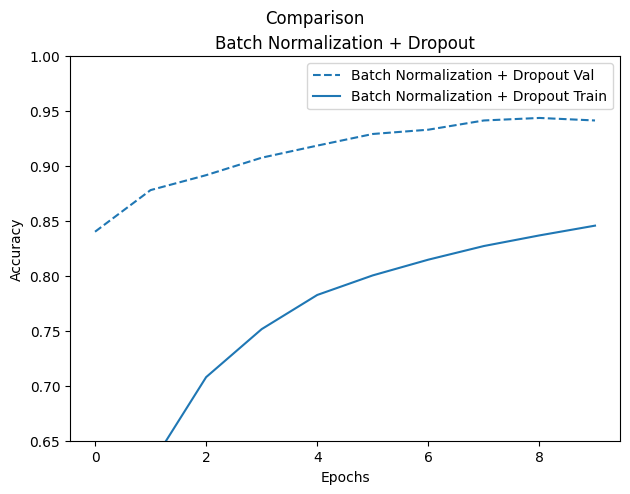

In [30]:
import matplotlib.pyplot as plt

def plot_history_subplots(histories, title):
    #plt.figure(figsize=(15,6))

    # Iterate through the histories and create subplots for each
    for idx, (name, history) in enumerate(histories):
        #plt.subplot(3, 2, idx + 1)
        val = plt.plot(history.epoch, history.history['val_accuracy'], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history['accuracy'], color=val[0].get_color(), label=name.title()+' Train')

        plt.title(name.title())
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.ylim(0.65,1)
        plt.legend()
        plt.tight_layout()

        plt.suptitle(title, y=1.02)
        plt.show()

plot_history_subplots([('dropout', history_dropout),
                       ('batch normalization', history_bn),
                       ('batch normalization + dropout', history_bn_dropout)],
                      'Comparison')

**Answer:**

Dropout comparison:
Training accuracy increased gradually over time- the model is learning. SO does validation but a slower rate which indicates that the dropout is helping to prevent overfitting.

Batch Normalization Comparison:

Training is steadily increasing close to flattening out which may mean the model is converging. The validation accuracy is very close. This may mean that the batch normalization is accuralry reducing covariate shift which may make training more stablle


Overall:

Drop out worked well to improve generalization.
Batch normalization improved stability and speed in teh model.
Both have their own positives.